In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep='\t', header=0)

#### 1. Вывести: кол-во наблюдений в датасете

In [3]:
print(df.shape[0])

4622


#### 2. Вывести названия столбцов

In [4]:
for col in df.columns.values:
    print(col)

order_id
quantity
item_name
choice_description
item_price


#### 3. Определить самую частую позицию (item) в заказе 

In [5]:
for val in df['item_name'].mode().values:
    print(val)

Chicken Bowl


#### 4. Построить гистрограмму частоты заказов по позициям (item )

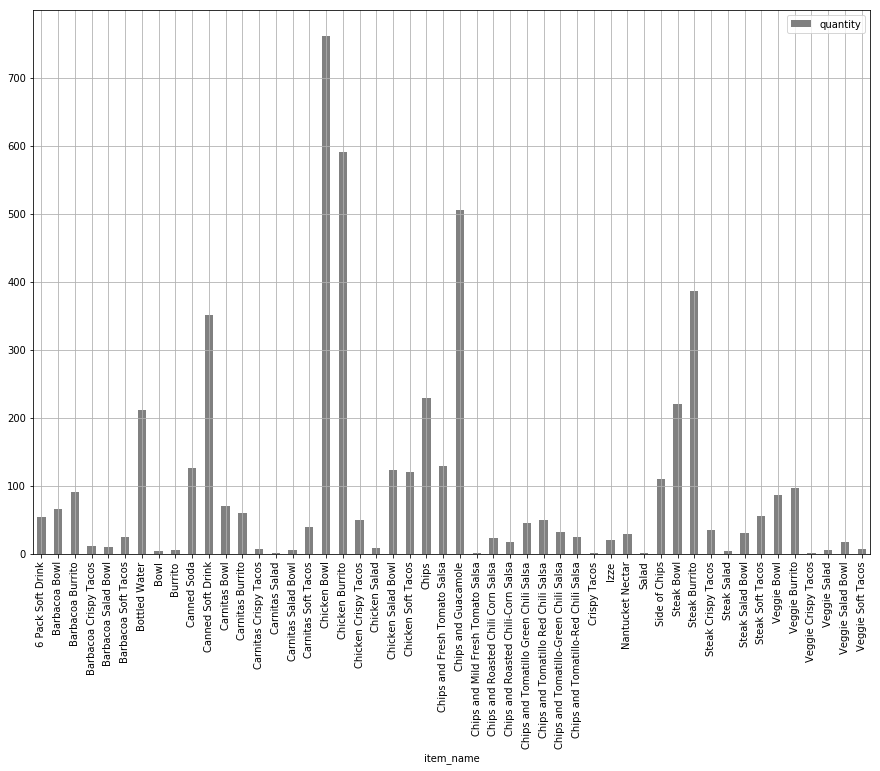

In [6]:
df.groupby('item_name').sum().plot.bar(y='quantity', figsize=(15,10), grid=True, color='gray')

#### 5. Измените тип переменной item_price с помощью лямбды функции

In [7]:
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

In [8]:
chips_price_row = df.loc[df['item_name'] == 'Chips'].iloc[0]
chips_price = chips_price_row['item_price'] / chips_price_row['quantity']
for i in range(df.shape[0]):
    if ' and ' in df.loc[i]['item_name']:
        items = df.loc[i]['item_name'].split(' and ')
        price = df.loc[i]['item_price']
        for it in items:
            if it == 'Chips':
                df.loc[i, 'item_name'] = 'Chips'
                df.loc[i, 'item_price'] = chips_price
            else:
                price = price - chips_price if price - chips_price > 0 else 0
                new_row = df.loc[i].copy()
                new_row['item_name'] = it
                new_row['item_price'] = price 
                df = df.append(new_row, ignore_index=True)
df = df.sort_values(['order_id'])
df = df.reset_index(drop=True)

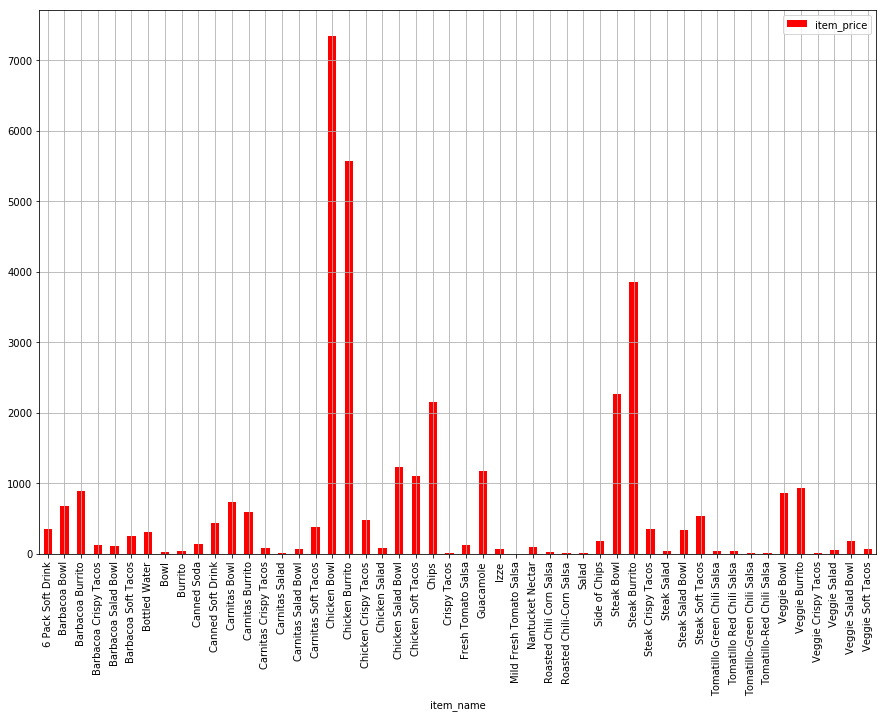

In [9]:
df.groupby('item_name').sum().plot.bar(y='item_price', figsize=(15,10), grid=True, color='red')

#### 7. Средняя сумма заказа (минимум 2 способа)

In [10]:
df.groupby('order_id').sum()['item_price'].mean()

18.81142857142869

In [11]:
df.groupby('order_id').sum()['item_price'].sum() / df['order_id'].nunique()

18.811428571428568

#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [12]:
df.groupby('order_id')['item_name'].nunique().agg(['mean', 'min', 'max', 'median'])

mean      2.7241
min       1.0000
max       9.0000
median    3.0000
Name: item_name, dtype: float64

#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [13]:
steak_df = df[df['item_name'].str.contains('Steak')]
steak_df.groupby('item_name')['quantity', 'item_price'].describe()

quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.711801  2.672417  8.69  9.250   9.25  11.75   
Steak Burrito           368.0  10.465842  2.571981  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0  10.209714  1.827732  8.69  9.120   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.847931  3.511170  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.746364  1.523743  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          26.07  
Steak Burrito       27.75  
Steak Crispy Tacos  17.98  
Steak Salad          8.99  
Steak Salad Bowl    23.78  
Steak Soft Tacos    18.50

In [14]:
sauce_df = df[df['choice_description'].str.contains('Mild|Medium|Hot', na=False)]
sauce_df['sauce'] = sauce_df['choice_description']
# sauce_df['sauce'] = sauce_df['choice_description'].str.replace(r"\b(?:(?!Mild|Medium|Hot)\w)+\b", "")
# sauce_df['sauce'] = 'Medium' if sauce_df['choice_description'].str.contains('Medium') else NaN
# sauce_df['sauce'] = 'Hot' if sauce_df['choice_description'].str.contains('Hot') else NaN
sauce_df.groupby('sauce')['quantity', 'item_price'].describe()

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


quantity            \
                                                      count      mean   
sauce                                                                   
[Fresh Tomato (Mild), [Black Beans, Guacamole, ...      1.0  1.000000   
[Fresh Tomato (Mild), [Black Beans, Rice, Sour ...      2.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Lettuce, Pint...      2.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Lettuce, Rice...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Lettuce, Rice...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Lettuce, Rice...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Rice, Black B...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Rice, Fajita ...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Rice, Sour Cr...      1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Rice]]                1.0  1.000000   
[Fresh Tomato (Mild), [Guacamole, Sour Cream, C...      2.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Black Beans, Gu...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      2.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Cheese]]                1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Fajita Veggies,...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Fajita Veggies,...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Guacamole, Pint...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Guacamole, Rice...      3.0  1.666667   
[Fresh Tomato (Mild), [Lettuce, Pinto Beans, Ri...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Rice, Cheese]]          1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Rice, Fajita Ve...      1.0  1.000000   
[Fresh Tomato (Mild), [Lettuce, Rice]]                  2.0  1.000000   
[Fresh Tomato (Mild), [Rice, Sour Cream, Cheese]]       1.0  1.000000   
[Fresh Tomato Salsa (Mild), Black Beans]                4.0  1.000000   
[Fresh Tomato Salsa (Mild), Cheese]                     1.0  1.000000   
[Fresh Tomato Salsa (Mild), Fajita Veggies]             1.0  1.000000   
[Fresh Tomato Salsa (Mild), Lettuce]                    1.0  1.000000   
[Fresh Tomato Salsa (Mild), [Black Beans, Chees...      1.0  1.000000   
[Fresh Tomato Salsa (Mild), [Black Beans, Fajit...      1.0  1.000000   
...                                                     ...       ...   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      6.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      2.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      2.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      2.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      2.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  2.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  1.000000   
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  1.000000   
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1.0  1.000000   
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1.0  1.000000   
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1.0  1.000000   
[[Tomatillo-Red Chili Salsa (Hot), F

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [15]:
exchange_rate = 74.28
df['item_price_rub'] = df['item_price'] * exchange_rate
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips,NaN,2.15,159.7020
1,1,1,Tomatillo-Green Chili Salsa,NaN,0.24,17.8272
2,1,1,Chips,NaN,2.15,159.7020
3,1,1,Fresh Tomato Salsa,NaN,0.24,17.8272
4,1,1,Izze,[Clementine],3.39,251.8092


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [16]:
df.groupby(['item_name', 'order_id']).agg({'quantity': 'count', 'item_price': 'mean'})

quantity  item_price
item_name         order_id                      
6 Pack Soft Drink 129              1        6.49
                  148              1        6.49
                  154              1        6.49
                  168              1        6.49
                  182              1        6.49
                  230              1        6.49
                  264              1        6.49
                  298              1        6.49
                  306              1        6.49
                  363              1        6.49
                  422              1        6.49
                  432              1        6.49
                  465              1        6.49
                  481              1        6.49
                  511              1        6.49
                  520              1        6.49
                  566              1        6.49
                  708              1        6.49
                  709              1        6.49
                  749              1        6.49
                  754              1        6.49
                  774              1        6.49
                  776              1        6.49
                  784              1        6.49
                  798              1        6.49
                  849              1        6.49
                  899              1        6.49
                  945              1        6.49
                  949              1        6.49
                  1076             1        6.49
...                              ...         ...
Veggie Salad      1094             1        8.49
                  1192             1        8.49
                  1263             1        8.49
                  1395             1        8.49
                  1635             1        8.49
Veggie Salad Bowl 83               1       11.25
                  128              1       11.25
                  195              1       11.25
                  207              1       11.25
                  394              1        8.75
                  536              1        8.75
                  760              1       11.25
                  869              1       11.25
                  896              1        8.75
                  913              1        8.75
                  1066             1        8.75
                  1289             1       11.25
                  1321             1        8.75
                  1646             1       11.25
                  1677             1       11.25
                  1700             1       11.25
                  1805             1        8.75
                  1818             1        8.75
Veggie Soft Tacos 304              1       11.25
                  322              1        8.75
                  567              1        8.49
                  688              1       11.25
                  948              1        8.75
                  1132             1        8.49
                  1559             1       16.98

[4996 rows x 2 columns]

#### Прожарки...

#### 12. Определить цену по каждой позиции в отдельности.

In [17]:
df['price_per_item'] = df['item_price'] / df['quantity']
df.groupby('item_name')['price_per_item'].unique()

item_name
6 Pack Soft Drink                                                         [6.49]
Barbacoa Bowl                            [11.75, 9.25, 8.99, 11.48, 8.69, 11.49]
Barbacoa Burrito                         [8.99, 9.25, 11.75, 11.08, 8.69, 11.48]
Barbacoa Crispy Tacos                                 [11.75, 9.25, 11.48, 8.99]
Barbacoa Salad Bowl                                                [11.89, 9.39]
Barbacoa Soft Tacos                                   [9.25, 8.99, 11.75, 11.48]
Bottled Water                                                        [1.09, 1.5]
Bowl                                                   [7.3999999999999995, 7.4]
Burrito                                                                    [7.4]
Canned Soda                                                               [1.09]
Canned Soft Drink                                                         [1.25]
Carnitas Bowl                                  [8.99, 11.75, 9.25, 11.48, 11.08]
Carnitas Burrito  